Задача тематическое моделирование

продолжаем исследование датасета с твитами

Скачиваем датасет (источник): положительные, отрицательные.

или можно через ноутбук

!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv

как альтернатива можно скачать данные из Роспотребнадзора
https://zpp.rospotrebnadzor.ru/Forum/Appeals
для этого берём ноутбук parse_rospotrebnadzor.ipynb
устанавливаем количество скачанных страниц больше не 50-сят хотябы 500 и для анализа берём только вопросы так как ответы есть не всегда

что надо сделать
1. объединить в одну выборку (это только для твитов), для роспотребнадзора сформировать датасет из вопросов
2. провести исследование и выявить тематики о которых говорят в твитах (для твитов), а для роспотребнадзора так же выявить тематики о которых люди пишут проанализировать
3. сделать визуализацию кластеров тематик
4. проинтерпритировать получившиеся тематики


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os

In [2]:
colnames = ['id', 'tdate', 'tmane', 'ttext', 'ttype', 'trep', 'trtw', 'tfav', 'tstcount', 'tfoll', 'tfrien', 'listcount']

In [3]:
data_df = pd.concat([pd.read_csv('positive.csv', sep=';', header=None, names=colnames, encoding='utf-8'),
                     pd.read_csv('negative.csv', sep=';', header=None,  names=colnames, encoding='utf-8')],
                     ignore_index=True
                   )

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226834 entries, 0 to 226833
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         226834 non-null  int64 
 1   tdate      226834 non-null  int64 
 2   tmane      226834 non-null  object
 3   ttext      226834 non-null  object
 4   ttype      226834 non-null  int64 
 5   trep       226834 non-null  int64 
 6   trtw       226834 non-null  int64 
 7   tfav       226834 non-null  int64 
 8   tstcount   226834 non-null  int64 
 9   tfoll      226834 non-null  int64 
 10  tfrien     226834 non-null  int64 
 11  listcount  226834 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 20.8+ MB


In [5]:
data_df.head()

,id,tdate,tmane,ttext,ttype,trep,trtw,tfav,tstcount,tfoll,tfrien,listcount
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1


In [6]:
import pymorphy2
from tqdm.notebook import tqdm
from nltk.corpus import stopwords
from multiprocessing import Pool



In [7]:
nltk.download('stopwords')
morph = pymorphy2.MorphAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chinyaev.av\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stopwords_list = stopwords.words('russian')

In [9]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))



In [10]:
data_df['ttext'] = list(map(lambda x: re.sub(r"@[\w]*", " ", x), data_df['ttext'].values))
data_df['ttext'] = list(map(lambda x: re.sub(r"http.*:.*", " ", x), data_df['ttext'].values))
data_df['ttext'] = list(map(lambda x: re.sub(r"[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+", " ", x), data_df['ttext'].values))
data_df['ttext'] = list(map(lambda x: re.sub(r"[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+", " ", x), data_df['ttext'].values))



In [11]:
print(preprocess(data_df.ttext.iloc[2020]))

['сидеть', 'сбербанк', 'пенза', 'рассказать', 'новый', 'продукт', 'вообще', 'правильно', 'бизнес', 'вести']


In [ ]:
stop

In [ ]:
%%time
pre_data = list(tqdm(map(preprocess, data_df['ttext']), total=len(data_df)))

In [ ]:
import csv
with open(r'pre_data_list.csv', 'w', encoding="utf-8") as fp:
    w = csv.writer(fp, delimiter =";")
    w.writerows(pre_data)


In [ ]:
stop

In [12]:
import csv
pre_data = list()
with open(r'pre_data_list.csv', 'r', encoding="utf-8",newline='\n') as fp:
    w = csv.reader(fp, delimiter =";")
    for row in w:
        pre_data.append(row)
    

In [13]:
data = pd.DataFrame()

data['text'] = data_df['ttext'].copy()
data['preproc_text'] = pre_data.copy()

In [14]:
data.head()

,text,preproc_text
0,хоть я и школота но поверь у нас то же сам...,"[школотый, поверь, самый, общество, профилиров..."
1,Да все таки он немного похож на него Но мой ...,"[всё, таки, немного, похожий, мальчик, всё, ра..."
2,Ну ты идиотка я испугалась за тебя,"[идиотка, испугаться]"
3,Кто то в углу сидит и погибает от голода...,"[угол, сидеть, погибать, голод, ещё, порция, в..."
4,Вот что значит страшилка \nНо блин посмотре...,"[значит, страшилка, блин, посмотреть, всё, час..."


In [15]:
from gensim.models import *
from gensim import corpora

In [16]:
dictionary = corpora.Dictionary(data['preproc_text'])
dictionary.filter_extremes(no_below = 10, no_above = 0.9) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('tweet.dict')

In [17]:
%%time 
corpus = [dictionary.doc2bow(text) for text in data['preproc_text']]
corpora.MmCorpus.serialize('tweet.model', corpus)

Wall time: 3.99 s


In [18]:
%%time 
lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, chunksize=50, update_every=1, passes=2)

Wall time: 1min 52s


In [19]:
lda.show_topics(num_topics=5, num_words=10, formatted=True)

[(0,
  '0.033*"очень" + 0.030*"завтра" + 0.027*"знать" + 0.024*"это" + 0.020*"делать" + 0.020*"любить" + 0.019*"свой" + 0.019*"идти" + 0.019*"сказать" + 0.018*"спать"'),
 (1,
  '0.046*"весь" + 0.029*"вообще" + 0.017*"год" + 0.016*"час" + 0.014*"урок" + 0.013*"утро" + 0.013*"ночь" + 0.012*"неделя" + 0.012*"последний" + 0.012*"твой"'),
 (2,
  '0.046*"мочь" + 0.040*"сегодня" + 0.017*"пойти" + 0.016*"жизнь" + 0.016*"скучать" + 0.015*"самый" + 0.015*"жаль" + 0.011*"ждать" + 0.010*"голова" + 0.010*"работа"'),
 (3,
  '0.058*"всё" + 0.044*"ещё" + 0.042*"это" + 0.025*"просто" + 0.024*"блин" + 0.024*"почему" + 0.016*"болеть" + 0.013*"думать" + 0.013*"говорить" + 0.010*"стать"'),
 (4,
  '0.068*"хотеть" + 0.040*"день" + 0.029*"всё" + 0.026*"это" + 0.023*"человек" + 0.019*"большой" + 0.017*"писать" + 0.016*"смотреть" + 0.016*"хороший" + 0.016*"дом"')]

In [20]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [21]:
%%time 
topic_model = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(topic_model)

# График не отображается в корп.сети, не удается загрузить скрипты *.js

C:\Anaconda3\envs\python37\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Wall time: 16.5 s


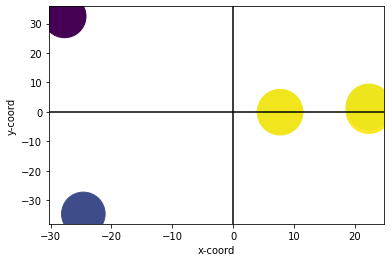

Wall time: 177 ms


In [22]:
%%time 
d = topic_model.topic_coordinates.copy()
d['Freq'] = d['Freq']*100
d['x']= d['x']*100
d['y']= d['y']*100
plt.scatter('x','y',c = 'Freq', s='Freq', data=d)
plt.xlabel('x-coord')
plt.ylabel('y-coord')
ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

In [23]:
# Если этот html открыть на устройстве вне коорп.сети можно увидеть график
pyLDAvis.save_html(topic_model,'index.html')

In [24]:
%%time
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  0.0001965371295995822
Wall time: 31.6 s


In [ ]:
stop

In [25]:
%%time
coherence_model_lda = CoherenceModel(model=lda, texts=data['preproc_text'], coherence='u_mass') # когерентность c_v отказывался считать на раб.компьютере, из-за ограниченных прав не смог разобраться в чем проблема
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  -4.695928136735228
Wall time: 2.41 s


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

  0%|          | 0/5 [00:00<?, ?it/s]

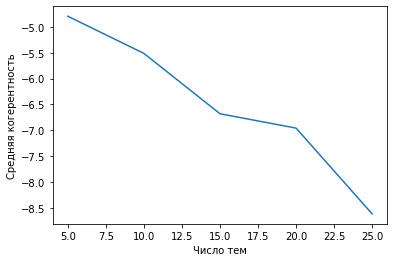

Wall time: 20min 29s


In [28]:
%%time 
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['preproc_text'], coherence='u_mass').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

График когрентности не показателен, когерентность c_v не считалась, CoherenceModel зависал

Слишком много мусора, жаргона в переписке в твиттер, стопслова можно добавлять и добавлять.
